In [221]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

1. **Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.**

In [222]:
y = np.random.uniform(0,1,10)
y[1] = 0
y[5] = 1
# Создадим фунцию, которая будет вычитать 1e-10 если элемент = 1, и заменять элемент равный нулю на 1e-10.
def del_zerro(x):
    y_pred =[]
    for i in x:
        if i == 0:
            i = 1e-10
        elif i == 1:
            i = 1-1e-10
        y_pred.append(i)
    return y_pred

# Добавим функцию del_zerro в функцию calc_logloss

def calc_logloss(y, y_pre_pred):
    y_pred = np.array([del_zerro(y_pre_pred)])
    return -np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))


In [223]:
# Пример применения del_zerro

del_zerro(y)


[0.15601864044243652,
 1e-10,
 0.05808361216819946,
 0.8661761457749352,
 0.6011150117432088,
 0.9999999999,
 0.020584494295802447,
 0.9699098521619943,
 0.8324426408004217,
 0.21233911067827616]

In [224]:
# Пример применения calc_logloss (для теста возмем только y!!!)

calc_logloss(y, y)

0.292521055670033

**Ответ:** Ошибок не возникает

**2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.**


In [225]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [226]:
def eval_model(X, y, iterations, alpha=1e-3):
    i_eval=[]
    err_eval = []
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 100) == 0:
            i_eval.append(i)
            err_eval.append(err)
  
    plt.axis(ymax=50, xmax=400)
    plt.grid(True)
    plt.suptitle('sgd_model')
    plt.axis(ymax = 2, xmax = 300)

    return plt.scatter(i_eval, err_eval, label=alpha)

In [227]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res


In [228]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])


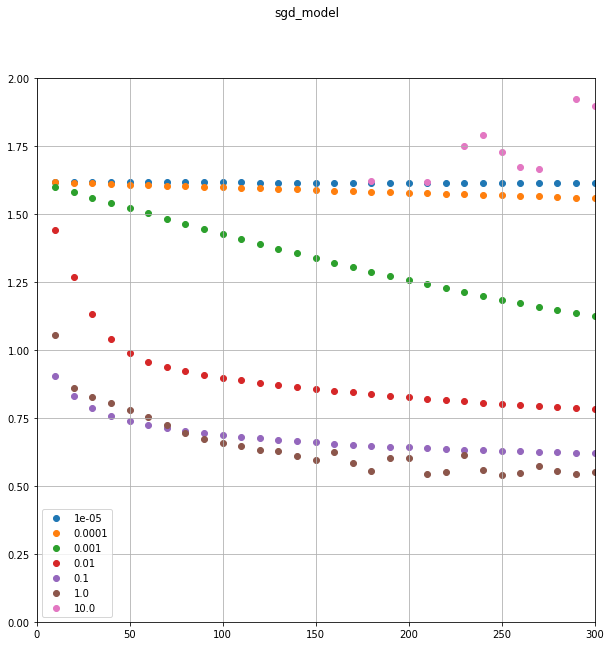

In [229]:
# В цикле посмотри при каких альфа log loss будет минимальным.
plt.figure(figsize=(10,10))
alpha = 1e-5
while alpha < 100:
  eval_model(X_st, y, iterations=1000, alpha=alpha)
  alpha *= 10

plt.legend()

**Ответ:** При alpha = 0.01 функция показывает оптимальный результат


**3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).**

In [230]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [197]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    # if i % (iterations / 10) == 0:
    #     print(i, W, err)
    return W
W = eval_model(X_st, y, iterations=100000, alpha=1e-2)

In [231]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [232]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [233]:
def calc_pred_proba(W, X):
    y_pred_proba = sigmoid(np.dot(W,X))
    return y_pred_proba

In [234]:
calc_pred_proba(W, X_st) 

array([0.28964718, 0.13239018, 0.99730794, 0.19964039, 0.73521642,
       0.28535565, 0.99936586, 0.08615267, 0.34267961, 0.99086206])

**4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).**

In [235]:
def calc_pred(W, X):
    y_pred = calc_pred_proba(W, X_st)
    for i in range(y_pred.shape[0]):
        if y_pred[i] >= 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    
    return y_pred

In [236]:
y_pred = calc_pred(W, X)
y_pred

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

In [237]:
train_accuracy = 100.0 - np.mean(np.abs(y_pred - y)*100.0)
train_accuracy

90.0

5. **Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.**

In [238]:
mae = y_pred-y
mae

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.])

In [239]:
# В условном mae мы можем получить отрицательное число (-1) в том случае, если мы предсказали False (0), а на самом деле True (1) => FN = -1. 
# Если мы предсказали True (1), а на самом деле False (0), то условный mae = 1 => FP. В остальных случаях mae будет = 0 и такой подход не подойдет.
FN = 0
FP = 0
for i in mae:
  if i == -1:
    FN += 1
  elif i == 1:
    FP += 1

FN, FP



(1, 0)

In [240]:
# Можно пройти в цикле и посмотреть совпадают ли значние
TP = 0
TN = 0
for i in range(len(y)):
  if y_pred[i] == y[i] and y[i]==0:
    TN += 1
  if y_pred[i] == y[i] and y[i]==1:
    TP +=1
TP, TN

# Можно еще рассмотреть вариант умножения значений: если при умножения значений получим 1, то TP, если получится значение 0, при равенстве предсказанного значения и реального, то TN


(4, 5)

In [241]:
matrix = [[TP, FP], [FN, TN]]
matrix

[[4, 0], [1, 5]]

In [242]:
accuracy = (TP+TN)/len(y)
accuracy

0.9

In [243]:
precision = TP/(TP+FP)
precision

1.0

In [244]:
recall = TP/(TP+FN)
recall

0.8

In [245]:
F_score = 2*precision*recall/(recall+precision)
F_score


0.888888888888889

In [246]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

(0.0, 1.0)

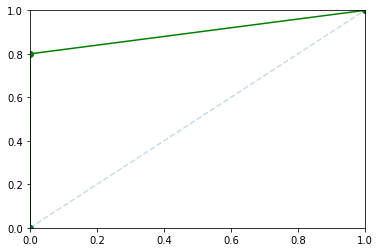

In [247]:
fpr, tpr, _ = roc_curve(y, y_pred)
plt.plot([0, 1], [0, 1], label="Random", linestyle="--", alpha=0.25)
plt.plot(fpr, tpr, color="green")
plt.scatter(fpr, tpr, color="green")
plt.xlim(0,1)
plt.ylim(0,1)

6. **Могла ли модель переобучиться? Почему?**



С одной стороны лишком хороший результат на небольшом количестве данных. С другой стороны при анализе данных нет видимой пропорциональной закономерности между одним из признаков и предсказанным результатом. Учитывая небольшую выборку объектов и признаков, сильно доверять данному результату, думаю, не стоит.